<div class="alert alert-block alert-success">
    <h1 align="center">Clustering Customers</h1>
</div>

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d

## Load and Prepare Data

In [26]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.shape

(200, 5)

In [ ]:
df.Gender.value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [ ]:
df[df['Annual Income (k$)'] == 137]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df[df['Annual Income (k$)'] == 15.0]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [ ]:
df[df['Spending Score (1-100)'] == df['Spending Score (1-100)'].max()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
11,12,Female,35,19,99


In [ ]:
df[df['Spending Score (1-100)'] == df['Spending Score (1-100)'].min()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
156,157,Male,37,78,1
158,159,Male,34,78,1


In [ ]:
df.groupby('Gender')['Annual Income (k$)'].mean()

Gender
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64

In [ ]:
df.groupby('Gender')['Spending Score (1-100)'].mean()

Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64

In [ ]:
df[df['Age'] == df['Age'].min()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
33,34,Male,18,33,92
65,66,Male,18,48,59
91,92,Male,18,59,41
114,115,Female,18,65,48


In [ ]:
df[df['Age'] == df['Age'].max()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
60,61,Male,70,46,56
70,71,Male,70,49,55


## Data Preprocessing

In [ ]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [27]:
df.drop('CustomerID', axis=1, inplace=True)

In [45]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

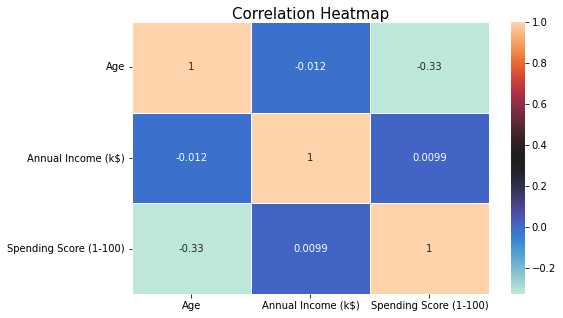

In [47]:
#Corrolation Cheking between numeric variables
plt.figure(figsize=(8,5))
Numeric = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
HeatMap=sns.heatmap(df[Numeric].corr(),annot=True,cmap=sns.color_palette("icefire", as_cmap=True),linewidths=0.5)
HeatMap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=2)
plt.show()

## Strorytelling - Visualization

In [ ]:
plt.rc('font', size=13) 
sns.set(style = 'darkgrid')

In [ ]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

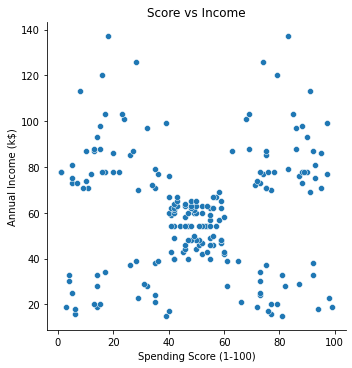

In [55]:
sns.relplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=df)
plt.title('Score vs Income')
plt.show()

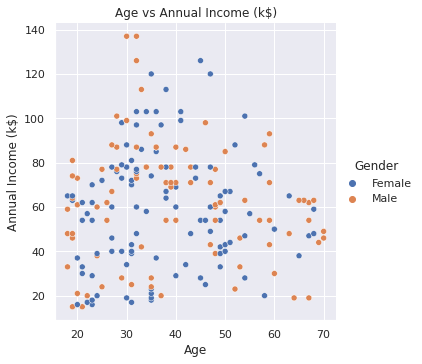

In [ ]:
sns.relplot(x='Age', y='Annual Income (k$)', data=df, hue='Gender')
plt.title('Age vs Annual Income (k$)')
plt.show()

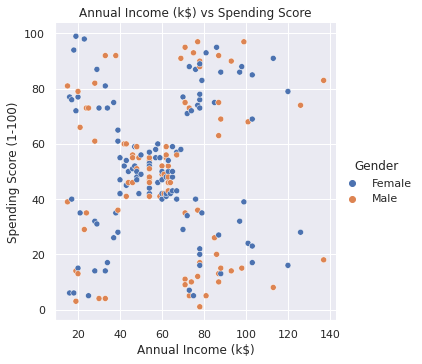

In [ ]:
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender')
plt.title('Annual Income (k$) vs Spending Score')
plt.show()

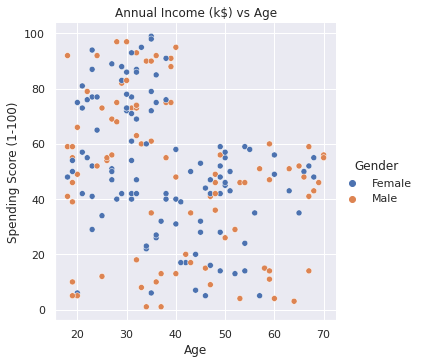

In [ ]:
sns.relplot(x='Age', y='Spending Score (1-100)', data=df, hue='Gender')
plt.title('Annual Income (k$) vs Age')
plt.show()

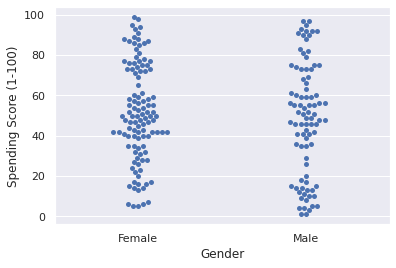

In [ ]:
sns.swarmplot(x="Gender", y="Spending Score (1-100)", data=df)
plt.show()

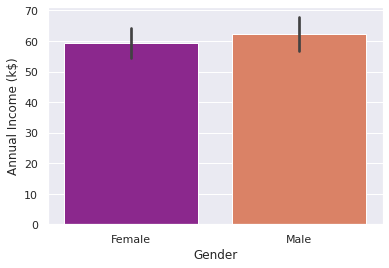

In [ ]:
sns.barplot(x ='Gender', y ='Annual Income (k$)', data = df ,palette ='plasma')
plt.show()

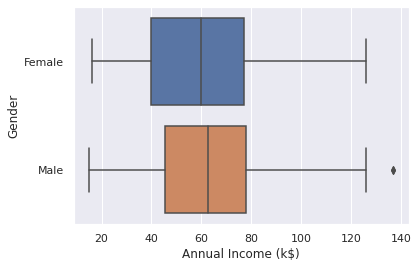

In [ ]:
sns.boxplot(data=df, y="Gender", x='Annual Income (k$)')
plt.show()

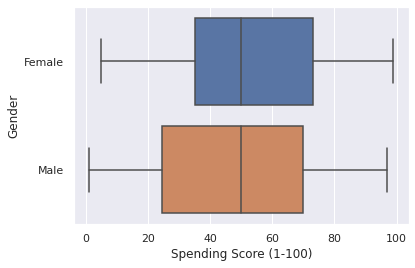

In [ ]:
sns.boxplot(data=df, y="Gender", x='Spending Score (1-100)')
plt.show()

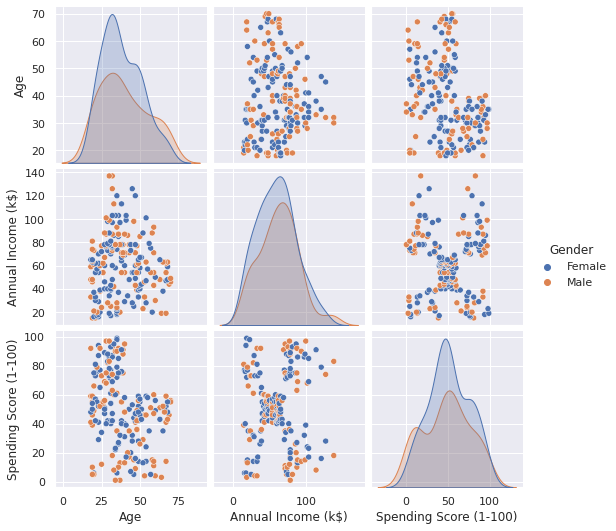

In [ ]:
sns.pairplot(df, hue='Gender')
plt.show()

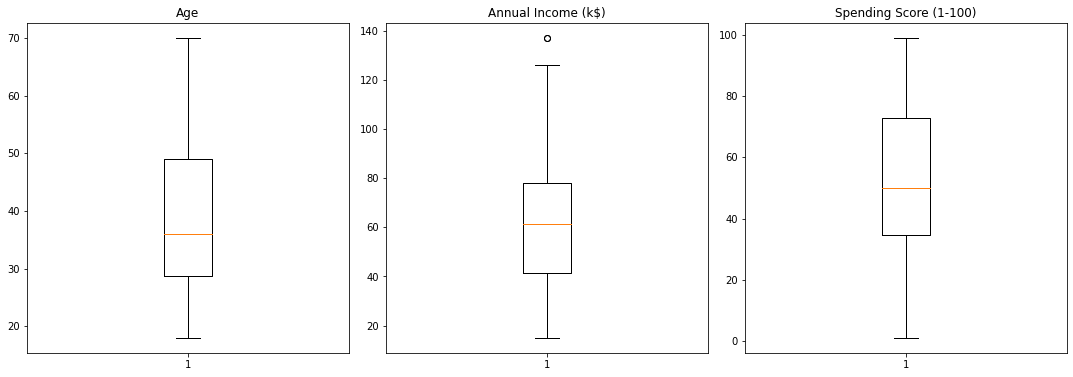

In [48]:
#Outlier checking using box plot
plt.figure(figsize=(20,20))
Numeric = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i, variable in enumerate(Numeric):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [28]:
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})

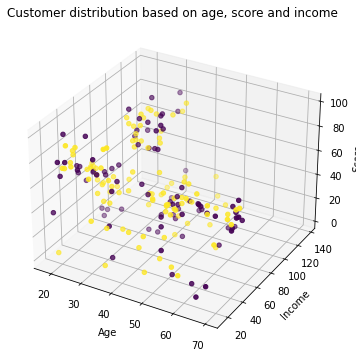

In [43]:
# plt.figure(figsize=(10,6))
fig = plt.figure()
fig.set_size_inches(8, 6)
ax = plt.axes(projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Gender'])
ax.set_title("Customer distribution based on age, score and income")
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Score')
plt.show()

## Trani the Model (Clustering)

### KMeans

In [56]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


#### Clustering Based on Age, Income, Score

In [86]:
X = df.iloc[:, [1, 2, 3]].values

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [88]:
wcss

[308812.78,
 212840.1698209719,
 143342.751571706,
 104366.15145556197,
 75378.76464074483,
 58302.40630860368,
 51118.949931647294,
 44312.46881207722,
 40894.98978213978,
 37468.51571576572]

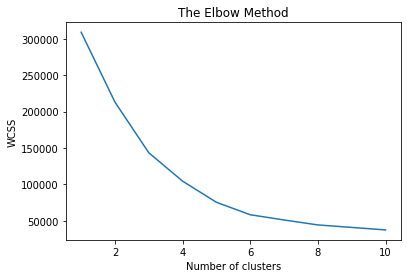

In [89]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [91]:
kmeans.cluster_centers_

array([[44.31818182, 25.77272727, 20.27272727],
       [32.69230769, 86.53846154, 82.12820513],
       [56.34090909, 53.70454545, 49.38636364],
       [25.27272727, 25.72727273, 79.36363636],
       [27.        , 56.65789474, 49.13157895],
       [41.68571429, 88.22857143, 17.28571429]])

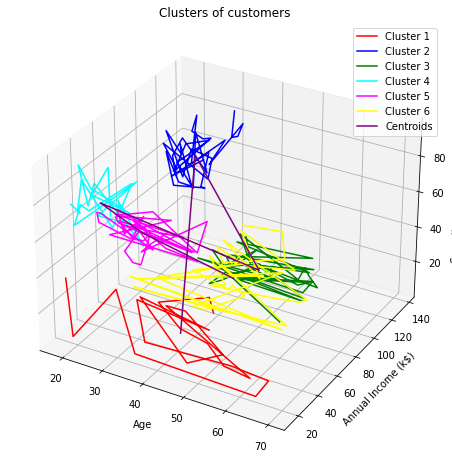

In [94]:
fig = plt.figure()
fig.set_size_inches(16, 8)
ax = plt.axes(projection ='3d')
ax.plot3D(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], c = 'red', label = 'Cluster 1')
ax.plot3D(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], c = 'blue', label = 'Cluster 2')
ax.plot3D(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], c = 'green', label = 'Cluster 3')
ax.plot3D(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], c = 'cyan', label = 'Cluster 4')
ax.plot3D(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], X[y_kmeans == 4, 2], c = 'magenta', label = 'Cluster 5')
ax.plot3D(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], X[y_kmeans == 5, 2], c = 'yellow', label = 'Cluster 6')
ax.plot3D(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c = 'purple', label = 'Centroids')
ax.set_title('Clusters of customers')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### Clustering Based on Income and Score

In [78]:
X = df.iloc[:, [ 2, 3]].values

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

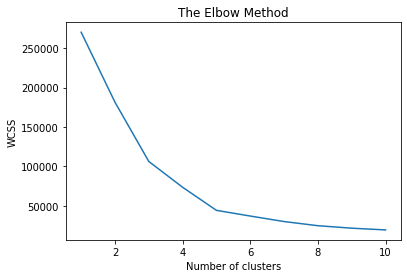

In [80]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [84]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


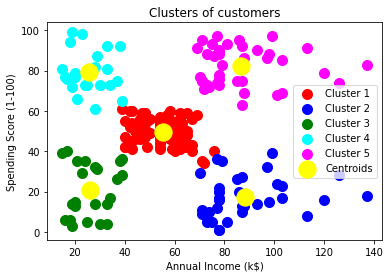

In [85]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### DBScan

### two variable

In [225]:
X = df.iloc[:, [2, 3]].values
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.4, min_samples=5).fit(X)
labels = db.labels_

In [226]:
n_clusters_ = len(set(labels))
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters:%d'% n_clusters_)
print('Estimated number of noise points:%d' % n_noise_)

Estimated number of clusters:5
Estimated number of noise points:15


In [208]:
pred_y = db.fit_predict(X)

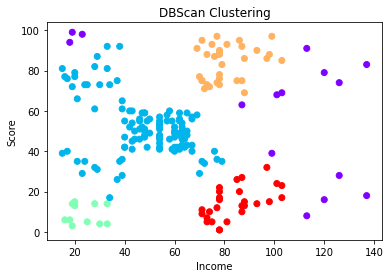

In [227]:
plt.scatter(df['Annual Income (k$)'],
            df['Spending Score (1-100)'], 
            c=db.labels_,
            cmap='rainbow')
plt.xlabel('Income')
plt.ylabel('Score')
plt.title('DBScan Clustering')
plt.show()

###  three variable

In [181]:
X = df.iloc[:, [1, 2, 3]].values
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.6, min_samples=10).fit(X)
labels = db.labels_

In [182]:
n_clusters_ = len(set(labels))
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters:%d'% n_clusters_)
print('Estimated number of noise points:%d' % n_noise_)

Estimated number of clusters:5
Estimated number of noise points:66
